#  BY - Gaurav Negi

 GRIP- The Sparks Foundation - Data Science and Business Analytics Internship

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import metrics
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#check for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
# check for shape of dataset
data.shape

(25, 2)

Text(0, 0.5, 'Percentage Score')

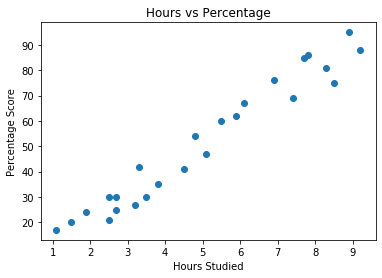

In [7]:
#plotting the distribution of scores
plt.scatter(data.Hours, data.Scores)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel("Percentage Score")

In [8]:
#Taking 80% of the data for training and 20% for testing
num = int(len(data)*0.8)

#Training data:
train = data[:num]

#Testing data:
test = data[num:]

print("Data: ", len(data))
print("Train: ", len(train))
print("Test: ", len(test))

Data:  25
Train:  20
Test:  5


In [9]:
# training the model:
regr = linear_model.LinearRegression()

train_x = np.array(train[["Hours"]])
train_y = np.array(train[["Scores"]])

regr.fit(train_x,train_y)

coefficients = regr.coef_
intercept = regr.intercept_

#slope:
print('Slope: ', coefficients[0])

#intercept:
print('intercept: ', intercept)

Slope:  [9.52038609]
intercept:  [3.03128304]


In [10]:
#predicting values for the whole dataset:

predicted_data = regr.predict(data[["Hours"]])
predicted_data[0:5]

array([[26.83224828],
       [51.58525212],
       [33.49651854],
       [83.95456485],
       [36.35263437]])

In [11]:
#predicting values for training data:

predicted_train = regr.predict(train[["Hours"]])
predicted_train[0:5]

array([[26.83224828],
       [51.58525212],
       [33.49651854],
       [83.95456485],
       [36.35263437]])

In [12]:
#predicting values for test data:

predicted_test = regr.predict(test[["Hours"]])
predicted_test[0:5]

array([[28.73632549],
       [48.72913629],
       [39.2087502 ],
       [68.72194709],
       [77.29029458]])

Text(0, 0.5, 'Percentage Scores')

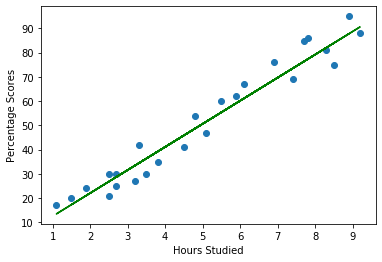

In [13]:
#plot the regression line for complete data:

plt.scatter(data["Hours"],data["Scores"])
plt.plot(data["Hours"], predicted_data, color = 'green')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')

Text(0, 0.5, 'Percentage Scores')

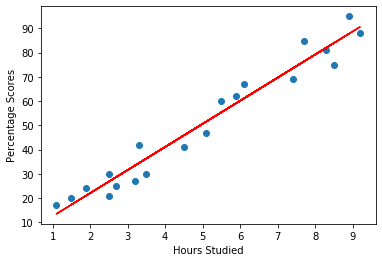

In [14]:
#plot the regression line for training data:
    
plt.scatter(train["Hours"] , train["Scores"])
plt.plot(train["Hours"], predicted_train, color = 'red')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')

Text(0, 0.5, 'Percentage Scores')

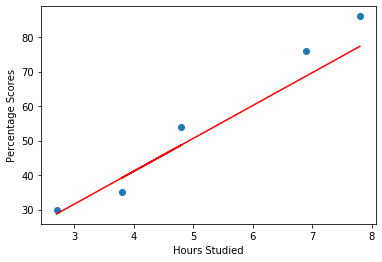

In [15]:
#plot the regression line for test data
plt.scatter(test["Hours"] , test["Scores"])
plt.plot(test["Hours"], predicted_test, color = 'red')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')

In [16]:
#Create dataframe for actual and predicted values:

A_P_data = pd.DataFrame({'Actual' : data.Scores, 'Predicted': predicted_data[:][0][0]})
print(A_P_data.head())

   Actual  Predicted
0      21  26.832248
1      47  26.832248
2      27  26.832248
3      75  26.832248
4      30  26.832248


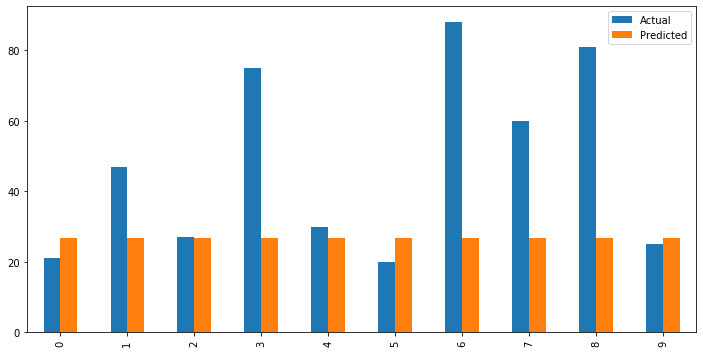

In [17]:
#plotting the bar graph for actual and predicted values

A_P_data.head(10).plot(kind = 'bar', figsize = (12,6))

In [18]:
#predicted score if a student studies for 9.25 hours/day

hrs = 9.25
pred_estimate = coefficients*hrs + intercept 
print("No of Hours = {}".format(hrs))
print("Predicted Score = {}".format(pred_estimate))

No of Hours = 9.25
Predicted Score = [[91.09485442]]


In [19]:
#Calculating error in predictions:


test_x = np.array(test[["Hours"]])
test_y = np.array(test[["Scores"]])

predicted_y = regr.predict(test_x)

res = (predicted_y- test_y)
RSS = (res*res).sum()

print("Residual Sum of Squares: ", RSS)

Residual Sum of Squares:  175.92147832368607


In [20]:
#Getting Mean absolute Error 

print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predicted_test)) 

Mean Absolute Error: 5.346209347444651


In [21]:
from sklearn.metrics import r2_score

r2 = r2_score(test.Scores, predicted_test)
print('r2 score for the model is', r2)

r2 score for the model is 0.9273291976521455


Thank you!